In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In dealing with Missing Values (NaNs), we decided to drop all three columnns with nans: 'waterfront', 'view', 'yr_renovated'. 'Waterfront': 88% (19,075) of observations were zeros & 11% (2,376) were NaNs; 'Yr_renovated': 79% (17,011) were zeros & 18% (3,842) were NaNs; finally, 'View': 90% (19,422) of observations were zeros; only 63 values missing, but we didn't think feature was varied enough to inform model in an meaningful way.  

Decided to leverage 'zipcode'; hence, dropped 'lat' and 'long'.

Dropped 'id' because it wasn't meaningful for our purposes.

Dropped 'date' because it was not meaningfully varied (all dates between 2014 & 2015).

In [2]:
df = df.drop(columns=['waterfront','view', 'yr_renovated', 'lat', 'long', 'id', 'date'], axis=1)

Addressed presence of '?' in 'sqft_basement'; changed the datatype.

In [38]:
#df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value='0').astype(str).astype(float).astype(int)

In [417]:
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

Dropped 'sqft_basement' because it was a zero-inflated variable, which would be challenging to work with for very little reward.

In [3]:
df = df.drop(columns=['sqft_basement'], axis=1)

In [336]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.053953,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.280102,-0.010722
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,-0.185771,0.713867,0.120981
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,-0.261570,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,-0.347210,0.326377,0.070777


Dropped 'sqft_above', 'bathrooms', 'grade', 'sqft_living15' for colinearity with 'sqft_living' [used a .75 threshhold].

In [4]:
df_dropped = df.drop(columns=['sqft_above', 'sqft_living15', 'bathrooms', 'grade'], axis=1)

In [444]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode,sqft_lot15
price,1.000000,0.308787,0.701917,0.089876,0.256804,0.036056,0.053953,-0.053402,0.082845
bedrooms,0.308787,1.000000,0.578212,0.032471,0.177944,0.026496,0.155670,-0.154092,0.030690
sqft_living,0.701917,0.578212,1.000000,0.173453,0.353953,-0.059445,0.318152,-0.199802,0.184342
sqft_lot,0.089876,0.032471,0.173453,1.000000,-0.004814,-0.008830,0.052946,-0.129586,0.718204
floors,0.256804,0.177944,0.353953,-0.004814,1.000000,-0.264075,0.489193,-0.059541,-0.010722
condition,0.036056,0.026496,-0.059445,-0.008830,-0.264075,1.000000,-0.361592,0.002888,-0.003126
yr_built,0.053953,0.155670,0.318152,0.052946,0.489193,-0.361592,1.000000,-0.347210,0.070777
zipcode,-0.053402,-0.154092,-0.199802,-0.129586,-0.059541,0.002888,-0.347210,1.000000,-0.147294
sqft_lot15,0.082845,0.030690,0.184342,0.718204,-0.010722,-0.003126,0.070777,-0.147294,1.000000


Dropped 1.3% of data (284 observations out of 21,597). A number of a outliers and top-end influencers that were impacting different independent variables.

In [7]:
indexNames = df_dropped[df_dropped['sqft_living'] >= 5000].index
df_dropped.drop(indexNames, inplace=True)

indexNames2 = df_dropped[df_dropped['bedrooms'] >= 8].index
df_dropped.drop(indexNames2, inplace=True)

indexNames3 = df_dropped[df_dropped['sqft_lot'] > 400000].index
df_dropped.drop(indexNames3, inplace=True)

indexNames4 = df_dropped[df_dropped['floors'] > 3.0].index
df_dropped.drop(indexNames4, inplace=True)

df_dropped.shape

(21313, 9)

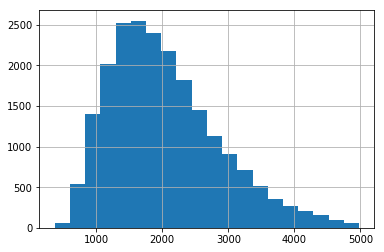

In [8]:
%matplotlib inline

df_dropped['sqft_living'].hist(bins=20)
plt.show()

In [5]:
df_dropped['sqft_living'].sort_values().head(50)

15367    370
860      380
21316    390
8614     410
11488    420
14452    420
465      430
1166     440
18038    460
15234    470
12063    470
8126     480
17380    480
4199     490
4647     500
2928     520
9632     520
6773     520
18045    520
2139     520
3220     520
7010     530
3578     530
12472    530
12744    540
14436    540
21310    550
17404    550
11576    550
18493    550
16516    560
11404    560
350      560
8493     560
3106     570
8591     570
17929    570
4142     580
10413    580
3282     580
17566    580
17567    580
18162    590
11497    590
10469    590
3983     590
17349    590
14756    600
13988    600
3060     600
Name: sqft_living, dtype: int64

In [9]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode,sqft_lot15
price,1.000000,0.301720,0.658674,0.076871,0.258218,0.050724,0.040137,-0.039223,0.060409
bedrooms,0.301720,1.000000,0.601117,0.041104,0.174992,0.027958,0.165418,-0.158621,0.028090
sqft_living,0.658674,0.601117,1.000000,0.180898,0.355343,-0.055257,0.329830,-0.200616,0.161346
sqft_lot,0.076871,0.041104,0.180898,1.000000,-0.027852,-0.013527,0.061600,-0.151817,0.788186
floors,0.258218,0.174992,0.355343,-0.027852,1.000000,-0.264831,0.491718,-0.058485,-0.027392
condition,0.050724,0.027958,-0.055257,-0.013527,-0.264831,1.000000,-0.360061,0.000384,-0.000425
yr_built,0.040137,0.165418,0.329830,0.061600,0.491718,-0.360061,1.000000,-0.345161,0.066029
zipcode,-0.039223,-0.158621,-0.200616,-0.151817,-0.058485,0.000384,-0.345161,1.000000,-0.151781
sqft_lot15,0.060409,0.028090,0.161346,0.788186,-0.027392,-0.000425,0.066029,-0.151781,1.000000


Dropped 'sqft_lot15' because of colinearity concerns with 'sqft_lot'.

In [10]:
df_dropped.drop(columns=['sqft_lot15'], axis=1, inplace=True)

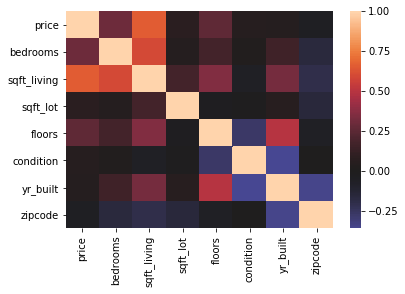

In [11]:
import seaborn as sns
sns.heatmap(df_dropped.corr(), center=0);

In [289]:
#df_dropped['floors'] = df_dropped['floors']*10
#df_dropped['floors'].astype(int).astype(float).head()

0    10.0
1    20.0
2    10.0
3    10.0
4    10.0
Name: floors, dtype: float64

In [342]:
#decade = ["{0}".format(year, year + 10) for year in range(1900, 2030, 10)]
#count_unique_decade = len(decade)

In [12]:
#df_dropped['decade_built'] = pd.cut(x=df_dropped['yr_built'], bins=count_unique_decade, labels=decade)
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,221900.0,3,1180,5650,1.0,3,1955,98178
1,538000.0,3,2570,7242,2.0,3,1951,98125
2,180000.0,2,770,10000,1.0,3,1933,98028
3,604000.0,4,1960,5000,1.0,5,1965,98136
4,510000.0,3,1680,8080,1.0,3,1987,98074


In [344]:
#df_dropped['decade_built'].astype(str).astype(float).head(2)

0    1960.0
1    1950.0
Name: decade_built, dtype: float64

In [345]:
#df_dropped.drop(columns=['yr_built'], axis=1, inplace=True)

Created dummy variables for 'yr_built', 'condition', and 'zipcode'.

In [13]:
#grade_dummies = pd.get_dummies(df_dropped['grade'], prefix="gd")
zip_dummies = pd.get_dummies(df_dropped['zipcode'], prefix="zp")
#decade_dummies = pd.get_dummies(df_dropped['decade_built'], prefix="dec")
year_dummies = pd.get_dummies(df_dropped['yr_built'], prefix="yr")
condition_dummies = pd.get_dummies(df_dropped['condition'], prefix="cond")
#floors_dummies = pd.get_dummies(df_dropped['floors'], prefix="floor")

In [14]:
df_dropped = df_dropped.drop(['zipcode', 'yr_built', 'condition'], axis=1)

In [15]:
df_dropped = pd.concat([df_dropped, zip_dummies, year_dummies, condition_dummies], axis=1)
df_dropped.head(2)

,price,bedrooms,sqft_living,sqft_lot,floors,zp_98001,zp_98002,zp_98003,zp_98004,zp_98005,...,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,cond_1,cond_2,cond_3,cond_4,cond_5
0,221900.0,3,1180,5650,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2570,7242,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


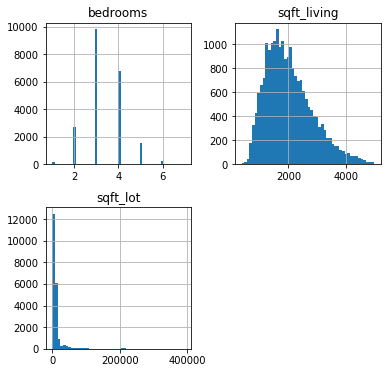

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

df_dropped[["sqft_living", "sqft_lot", "bedrooms"]].hist(bins=50, figsize  = [6, 6])
plt.show()

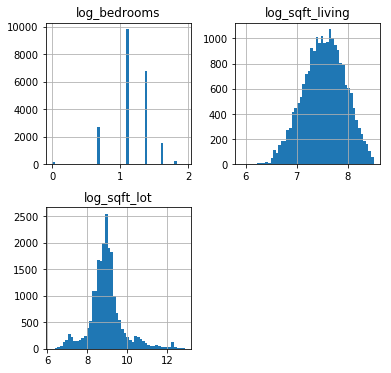

In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data_log = pd.DataFrame([])
data_log["log_sqft_living"] = np.log(df_dropped["sqft_living"])
data_log["log_sqft_lot"] = np.log(df_dropped["sqft_lot"])
#data_log["log_floors"] = np.log(df_dropped['floors'])
data_log["log_bedrooms"] = np.log(df_dropped["bedrooms"])
data_log.hist(bins=50, figsize  = [6, 6]);

Transformed 'sqft_living', 'sqft_lot' & 'bedrooms' to bring these features more in line with normal distribution.

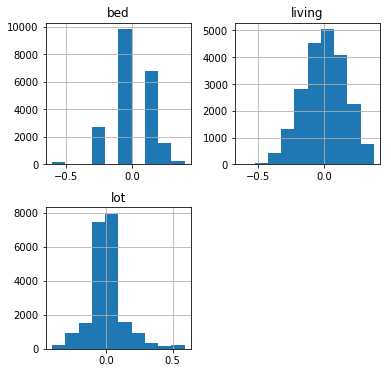

In [20]:
logbed = data_log["log_bedrooms"]
logsqftliving = data_log["log_sqft_living"]
logsqftlot = data_log["log_sqft_lot"]
#logfloors = data_log["log_floors"]

#Standardized using mean normalization
scaled_bed = (logbed-np.mean(logbed))/(max(logbed)-min(logbed))
scaled_sqft_living = (logsqftliving-np.mean(logsqftliving))/(max(logsqftliving)-min(logsqftliving))
scaled_sqft_lot = (logsqftlot-np.mean(logsqftlot))/(max(logsqftlot)-min(logsqftlot))
#scaled_floors = (logfloors-np.mean(logfloors))/(max(logfloors)-min(logfloors))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled["bed"]= scaled_bed
data_cont_scaled["living"]= scaled_sqft_living
data_cont_scaled["lot"] = scaled_sqft_lot
#data_cont_scaled["floors"] = scaled_floors

data_cont_scaled.hist(figsize  = [6, 6]);

In [21]:
df_dropped['bedrooms'] = data_cont_scaled["bed"]
df_dropped['sqft_living'] = data_cont_scaled["living"]
df_dropped['sqft_lot'] = data_cont_scaled["lot"]
#df_dropped['floors'] = data_cont_scaled["floors"]

In [22]:
df_dropped.head(3)

,price,bedrooms,sqft_living,sqft_lot,floors,zp_98001,zp_98002,zp_98003,zp_98004,zp_98005,...,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,cond_1,cond_2,cond_3,cond_4,cond_5
0,221900.0,-0.038467,-0.178897,-0.049888,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,-0.038467,0.120521,-0.012425,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,-0.246835,-0.343102,0.036272,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [261]:
#import pandas as pd
#from sklearn import preprocessing

#float_array = df_dropped['sqft_living'].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(float_array)
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized.head()

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
#formula = "price ~ sqft_living+floors+bedrooms+sqft_living15"
#model = ols(formula= formula, data=df_dropped).fit()

In [24]:
outcome = 'price'
predictors = df_dropped.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [25]:
model = ols(formula= formula, data=df_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     267.0
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:55:23   Log-Likelihood:            -2.8693e+05
No. Observations:               21313   AIC:                         5.742e+05
Df Residuals:                   21120   BIC:                         5.758e+05
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.005e+05   7056.726     56.749      0.000    3.87e+05    4.14e+05
bedrooms    -1.955e+05   1.12e+04    -17.388      0.000   -2.17e+05   -1.73e+05
sqft_living  1.051e+06   1.23e+04     85.319      0.000    1.03e+06    1.07e+06
sqft_lot     4.253e+05   1.39e+04     30.621      0.000    3.98e+05    4.52e+05
floors       2.335e+04   3333.018      7.007      0.000    1.68e+04    2.99e+04
zp_98001    -2.424e+05   9077.121    -26.705      0.000    -2.6e+05   -2.25e+05
zp_98002    -2.089e+05   1.21e+04    -17.220      0.000   -2.33e+05   -1.85e+05
zp_98003    -2.081e+05   1.03e+04    -20.153      0.000   -2.28e+05   -1.88e+05
zp_98004     5.908e+05   1.01e+04     58.453      0.000    5.71e+05    6.11e+05
zp_98005       1.6e+05   1.34e+04     11.964      0.000    1.34e+05    1.86e+05
zp_98006     1.506e+05   8102.498     18.588      0.000    1.35e+05    1.66e+05
zp_98007     8.137e+04   1.44e+04      5.638      0.000    5.31e+04     1.1e+05
zp_98008     1.124e+05   1.05e+04     10.739      0.000    9.19e+04    1.33e+05
zp_98010    -1.963e+05   1.73e+04    -11.366      0.000    -2.3e+05   -1.62e+05
zp_98011    -8.497e+04   1.22e+04     -6.954      0.000   -1.09e+05    -6.1e+04
zp_98014    -1.895e+05    1.6e+04    -11.856      0.000   -2.21e+05   -1.58e+05
zp_98019    -1.872e+05   1.25e+04    -14.916      0.000   -2.12e+05   -1.63e+05
zp_98022    -2.495e+05   1.17e+04    -21.351      0.000   -2.72e+05   -2.27e+05
zp_98023     -2.21e+05   7851.007    -28.154      0.000   -2.36e+05   -2.06e+05
zp_98024    -1.322e+05   1.98e+04     -6.662      0.000   -1.71e+05   -9.33e+04
zp_98027    -3.802e+04   8650.605     -4.395      0.000    -5.5e+04   -2.11e+04
zp_98028    -9.069e+04   1.02e+04     -8.924      0.000   -1.11e+05   -7.08e+04
zp_98029     3.023e+04   9829.452      3.076      0.002     1.1e+04    4.95e+04
zp_98030    -2.319e+05   1.07e+04    -21.614      0.000   -2.53e+05   -2.11e+05
zp_98031    -2.126e+05   1.04e+04    -20.351      0.000   -2.33e+05   -1.92e+05
zp_98032    -1.973e+05   1.53e+04    -12.877      0.000   -2.27e+05   -1.67e+05
zp_98033     1.976e+05   8320.029     23.746      0.000    1.81e+05    2.14e+05
zp_98034     2.122e+04   7601.019      2.792      0.005    6320.872    3.61e+04
zp_98038    -2.204e+05   7376.039    -29.885      0.000   -2.35e+05   -2.06e+05
zp_98039     1.065e+06   2.62e+04     40.717      0.000    1.01e+06    1.12e+06
zp_98040     4.191e+05   1.07e+04     39.192      0.000    3.98e+05     4.4e+05
zp_98042    -2.257e+05   7585.794    -29.753      0.000   -2.41e+05   -2.11e+05
zp_98045    -1.533e+05   1.19e+04    -12.886      0.000   -1.77e+05    -1.3e+05
zp_98052     5.346e+04   7312.588      7.311      0.000    3.91e+04    6.78e+04
zp_98053    -2.298e+04   9021.583     -2.547      0.011   -4.07e+04   -5295.459
zp_98055    -1.697e+05   1.05e+04    -16.22

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_dropped, test_size=0.25)

In [194]:
len(train)

16171

In [195]:
len(test)

5391

In [27]:
outcome = 'price'
predictors = train.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [28]:
model = ols(formula= formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:55:59   Log-Likelihood:            -2.1523e+05
No. Observations:               15984   AIC:                         4.309e+05
Df Residuals:                   15791   BIC:                         4.323e+05
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.883e+05   8772.530     44.265      0.000    3.71e+05    4.06e+05
bedrooms    -2.001e+05   1.31e+04    -15.306      0.000   -2.26e+05   -1.74e+05
sqft_living  1.054e+06   1.43e+04     73.503      0.000    1.03e+06    1.08e+06
sqft_lot     4.206e+05   1.61e+04     26.084      0.000    3.89e+05    4.52e+05
floors       2.794e+04   3854.980      7.247      0.000    2.04e+04    3.55e+04
zp_98001    -2.433e+05   1.06e+04    -22.857      0.000   -2.64e+05   -2.22e+05
zp_98002    -2.087e+05   1.44e+04    -14.467      0.000   -2.37e+05    -1.8e+05
zp_98003    -2.116e+05    1.2e+04    -17.643      0.000   -2.35e+05   -1.88e+05
zp_98004     5.787e+05   1.18e+04     48.867      0.000    5.55e+05    6.02e+05
zp_98005     1.719e+05   1.55e+04     11.071      0.000    1.41e+05    2.02e+05
zp_98006     1.509e+05   9381.130     16.081      0.000    1.32e+05    1.69e+05
zp_98007     8.577e+04   1.75e+04      4.909      0.000    5.15e+04     1.2e+05
zp_98008     1.336e+05   1.24e+04     10.763      0.000    1.09e+05    1.58e+05
zp_98010    -1.919e+05   1.98e+04     -9.679      0.000   -2.31e+05   -1.53e+05
zp_98011     -8.67e+04   1.49e+04     -5.831      0.000   -1.16e+05   -5.76e+04
zp_98014     -1.77e+05   1.82e+04     -9.718      0.000   -2.13e+05   -1.41e+05
zp_98019    -1.952e+05   1.47e+04    -13.262      0.000   -2.24e+05   -1.66e+05
zp_98022    -2.538e+05   1.38e+04    -18.384      0.000   -2.81e+05   -2.27e+05
zp_98023    -2.219e+05   8875.022    -25.003      0.000   -2.39e+05   -2.05e+05
zp_98024    -1.392e+05   2.16e+04     -6.442      0.000   -1.82e+05   -9.69e+04
zp_98027    -3.643e+04   1.01e+04     -3.605      0.000   -5.62e+04   -1.66e+04
zp_98028     -8.97e+04   1.17e+04     -7.692      0.000   -1.13e+05   -6.68e+04
zp_98029     2.499e+04   1.13e+04      2.211      0.027    2835.747    4.71e+04
zp_98030    -2.258e+05   1.31e+04    -17.243      0.000   -2.51e+05      -2e+05
zp_98031    -2.182e+05   1.22e+04    -17.866      0.000   -2.42e+05   -1.94e+05
zp_98032    -1.994e+05   1.73e+04    -11.556      0.000   -2.33e+05   -1.66e+05
zp_98033     1.947e+05   9631.382     20.215      0.000    1.76e+05    2.14e+05
zp_98034     2.627e+04   8725.251      3.011      0.003    9171.840    4.34e+04
zp_98038     -2.19e+05   8545.171    -25.631      0.000   -2.36e+05   -2.02e+05
zp_98039     1.104e+06   3.06e+04     36.070      0.000    1.04e+06    1.16e+06
zp_98040     4.237e+05   1.23e+04     34.451      0.000       4e+05    4.48e+05
zp_98042    -2.215e+05   8675.914    -25.532      0.000   -2.39e+05   -2.05e+05
zp_98045     -1.58e+05   1.39e+04    -11.335      0.000   -1.85e+05   -1.31e+05
zp_98052      5.65e+04   8516.908      6.633      0.000    3.98e+04    7.32e+04
zp_98053    -1.674e+04   1.05e+04     -1.592      0.111   -3.73e+04    3867.364
zp_98055    -1.715e+05   1.21e+04    -14.16

In [29]:
outcome = 'price'
predictors = test.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [30]:
model = ols(formula= formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     71.33
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:56:11   Log-Likelihood:                -71577.
No. Observations:                5329   AIC:                         1.435e+05
Df Residuals:                    5136   BIC:                         1.448e+05
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.333e+05   1.28e+04     33.894      0.000    4.08e+05    4.58e+05
bedrooms    -1.842e+05   2.24e+04     -8.232      0.000   -2.28e+05    -1.4e+05
sqft_living  1.045e+06   2.43e+04     43.048      0.000    9.98e+05    1.09e+06
sqft_lot     4.417e+05   2.78e+04     15.879      0.000    3.87e+05    4.96e+05
floors       5714.1972   6730.090      0.849      0.396   -7479.645    1.89e+04
zp_98001    -2.435e+05   1.74e+04    -13.979      0.000   -2.78e+05   -2.09e+05
zp_98002    -2.071e+05   2.26e+04     -9.177      0.000   -2.51e+05   -1.63e+05
zp_98003    -1.998e+05   2.04e+04     -9.805      0.000    -2.4e+05    -1.6e+05
zp_98004     6.237e+05   1.95e+04     31.973      0.000    5.85e+05    6.62e+05
zp_98005     1.305e+05   2.66e+04      4.908      0.000    7.84e+04    1.83e+05
zp_98006     1.504e+05   1.62e+04      9.302      0.000    1.19e+05    1.82e+05
zp_98007      7.18e+04   2.56e+04      2.801      0.005    2.16e+04    1.22e+05
zp_98008     5.881e+04   1.95e+04      3.010      0.003    2.05e+04    9.71e+04
zp_98010    -2.247e+05   3.56e+04     -6.309      0.000   -2.95e+05   -1.55e+05
zp_98011    -7.881e+04   2.15e+04     -3.673      0.000   -1.21e+05   -3.68e+04
zp_98014    -2.294e+05   3.36e+04     -6.828      0.000   -2.95e+05   -1.63e+05
zp_98019    -1.682e+05   2.41e+04     -6.987      0.000   -2.15e+05   -1.21e+05
zp_98022    -2.415e+05   2.21e+04    -10.912      0.000   -2.85e+05   -1.98e+05
zp_98023    -2.198e+05   1.71e+04    -12.880      0.000   -2.53e+05   -1.86e+05
zp_98024    -9.468e+04   5.14e+04     -1.843      0.065   -1.95e+05    6009.800
zp_98027    -4.345e+04   1.68e+04     -2.590      0.010   -7.63e+04   -1.06e+04
zp_98028    -9.975e+04   2.09e+04     -4.773      0.000   -1.41e+05   -5.88e+04
zp_98029      4.77e+04      2e+04      2.383      0.017    8465.779    8.69e+04
zp_98030     -2.46e+05   1.88e+04    -13.102      0.000   -2.83e+05   -2.09e+05
zp_98031    -2.012e+05   2.03e+04     -9.898      0.000   -2.41e+05   -1.61e+05
zp_98032    -1.864e+05   3.37e+04     -5.526      0.000   -2.53e+05    -1.2e+05
zp_98033     2.073e+05   1.66e+04     12.449      0.000    1.75e+05     2.4e+05
zp_98034     5017.6896   1.56e+04      0.321      0.748   -2.56e+04    3.57e+04
zp_98038    -2.254e+05   1.47e+04    -15.306      0.000   -2.54e+05   -1.97e+05
zp_98039     9.661e+05   5.06e+04     19.103      0.000    8.67e+05    1.07e+06
zp_98040     4.046e+05   2.18e+04     18.565      0.000    3.62e+05    4.47e+05
zp_98042    -2.358e+05   1.57e+04    -14.976      0.000   -2.67e+05   -2.05e+05
zp_98045    -1.397e+05    2.3e+04     -6.082      0.000   -1.85e+05   -9.47e+04
zp_98052     4.688e+04   1.43e+04      3.269      0.001    1.88e+04     7.5e+04
zp_98053    -4.547e+04   1.77e+04     -2.571      0.010   -8.01e+04   -1.08e+04
zp_98055     -1.63e+05   2.08e+04     -7.83